# Best OS metrics

We want to select potential candidates for features in our models from OS metrics. There are many of them (1962), so we need to do it automatically.

We'll fit simple linear regression model on every metrics as a feature and comparing R-squared.

We'll start with Linpack experiment.

In [1]:
import pandas as pd

from helpers.load_data import (
    get_data_with_metrics,
    get_experiments_paths,
    trim_experiment,
)
from helpers.regression import (
    draw_regression_graph,
    fit_regression,
)

experiments_path = '../../data'
experiment_name = 'linpack_1_linpack_11'

path = next(get_experiments_paths(experiment_name, experiments_path))
df = get_data_with_metrics(path, instances_n=12, cpu_window=30)

df = trim_experiment(df, 12)

In [2]:
def get_rsquared_for_features(df: pd.DataFrame, target: str, features: list):
    rsquared_list = []

    for i, feature in enumerate(features):
        try:
            results = fit_regression(data=df, formula=f'{target} ~ {feature}')
            rsquared_list.append((results.rsquared, feature))
        except Exception as e:
            print(f'\nError on feature {feature}!')
            print(str(e))

        if (i + 1) % 20 == 0:
            print(f'{i+1}/{len(features)}, ', end='', flush=True)

    return rsquared_list

In [ ]:
features = ['instances_n', 'cpu', 'memory'] + list(df.columns[9:])
rsquared_list = get_rsquared_for_features(df, 'app_throughput', features)

20/1952, 40/1952, 60/1952, 80/1952, 

In [ ]:
rsquared_list.sort(reverse=True)

for rsquared, feature in rsquared_list:
    if rsquared > 0.6:
        print(f'{rsquared:.6f}: {feature}')

In [6]:
results = fit_regression(data=df, formula=f'app_throughput ~ node_cpu_seconds_total_cpu_4mode_iowait_ + node_filesystem_files_free_device__dev_mapper_baati__vg_rootfstype_ext4mountpoint___')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         app_throughput   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     1006.
Date:                Fri, 06 Nov 2020   Prob (F-statistic):           3.99e-76
Time:                        14:21:44   Log-Likelihood:                -254.08
No. Observations:                 124   AIC:                             514.2
Df Residuals:                     121   BIC:                             522.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                                                                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

## Same for Redis Ycsb 8x20min

In [9]:
experiment_name = 'redis_ycsb_1_redis_ycsb_11'

path = next(get_experiments_paths(experiment_name, experiments_path))
df = get_data_with_metrics(path, instances_n=12, cpu_window=30)
df = trim_experiment(df, 12)

In [10]:
features = ['instances_n', 'cpu', 'memory'] + list(df.columns[9:])
rsquared_list = get_rsquared_for_features(df, 'app_latency', features)

20/1525, 40/1525, 60/1525, 80/1525, 100/1525, 120/1525, 140/1525, 160/1525, 180/1525, 200/1525, 220/1525, 240/1525, 260/1525, 280/1525, 300/1525, 320/1525, 340/1525, 360/1525, 380/1525, 400/1525, 420/1525, 440/1525, 460/1525, 480/1525, 500/1525, 520/1525, 540/1525, 560/1525, 580/1525, 600/1525, 620/1525, 640/1525, 660/1525, 680/1525, 700/1525, 720/1525, 740/1525, 760/1525, 780/1525, 800/1525, 820/1525, 840/1525, 860/1525, 880/1525, 900/1525, 920/1525, 940/1525, 960/1525, 980/1525, 1000/1525, 1020/1525, 1040/1525, 1060/1525, 1080/1525, 1100/1525, 1120/1525, 1140/1525, 1160/1525, 1180/1525, 1200/1525, 1220/1525, 1240/1525, 1260/1525, 1280/1525, 1300/1525, 1320/1525, 1340/1525, 1360/1525, 1380/1525, 1400/1525, 1420/1525, 1440/1525, 1460/1525, 1480/1525, 1500/1525, 1520/1525, 

In [11]:
rsquared_list.sort(reverse=True)

for rsquared, feature in rsquared_list:
    if rsquared > 0.6:
        print(f'{rsquared:.6f}: {feature}')

0.989726: instances_n
0.989601: node_memory_SUnreclaim_bytes
0.989425: node_memory_KernelStack_bytes
0.989243: node_filesystem_files_free_device__dev_mapper_baati__vg_rootfstype_ext4mountpoint___
0.989163: node_filefd_allocated
0.988975: node_memory_PageTables_bytes
0.988929: node_sockstat_UDP6_inuse
0.988724: node_memory_Shmem_bytes
0.988645: node_filesystem_files_free_device_tmpfsfstype_tmpfsmountpoint__run_
0.988556: node_sockstat_sockets_used
0.988109: node_memory_Committed_AS_bytes
0.987939: node_sockstat_TCP_alloc
0.987707: node_sockstat_TCP_inuse
0.987577: node_filesystem_free_bytes_device_tmpfsfstype_tmpfsmountpoint__run_
0.987577: node_filesystem_avail_bytes_device_tmpfsfstype_tmpfsmountpoint__run_
0.987397: node_nfsd_requests_total_method_SetAttrproto_4_
0.987397: node_nfsd_requests_total_method_SaveFHproto_4_
0.987397: node_nfs_requests_total_method_Renameproto_4_
0.987397: node_nfsd_requests_total_method_Renameproto_4_
0.987397: node_nfsd_requests_total_method_Lookupproto_4

# Plot OS metrics

Function plots all OS metrics of an experiment.

As we can see, some of them are staircase shaped, so they could be a candidate for a feature in our models, e.g.:
* `node_memory_Active_anon_bytes`
* `node_filefd_allocated`
* `node_memory_Buffers_bytes`
* `node_memory_Shmem_bytes`
* `node_memory_Slab_bytes`
* `node_disk_written_bytes_total{device="dm-0"}`
* `node_memory_AnonPages_bytes`
* `node_load1`
* `node_sockstat_sockets_used`
* `node_memory_PageTables_bytes`
* `node_memory_Commited_AS_bytes`
* `node_memory_KernelStack_bytes`

In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

from helpers.load_data import (
    get_experiments_paths,
    get_os_metrics,
)


def plot_os_metric(df: pd.DataFrame, metric: str):
    try:
        plt.subplots(figsize=(8,4))
        df[metric].plot(title=metric)
        plt.show()
    except ValueError as e:
        print(f'Cannot plot {metric}.')
        print(str(e))
        print(f'Value: {df[metric][0]}')

        
def plot_all_os_metrics(df: pd.DataFrame):
    for column_name in df.columns:
        plot_os_metric(df, column_name)


experiments_path = '../../data'
experiment_name = 'linpack_1_linpack_11'

path = next(get_experiments_paths(experiment_name, experiments_path))
df = get_os_metrics(path)

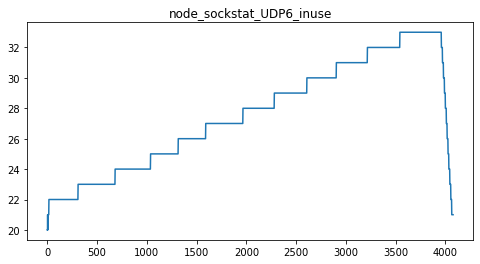

In [3]:
plot_os_metric(df, 'node_sockstat_UDP6_inuse')

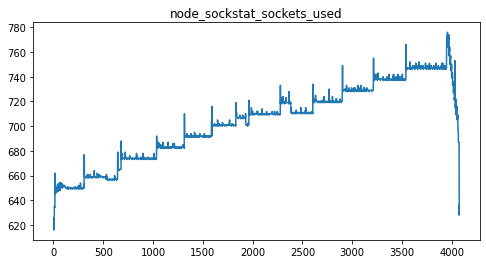

In [4]:
plot_os_metric(df, 'node_sockstat_sockets_used')

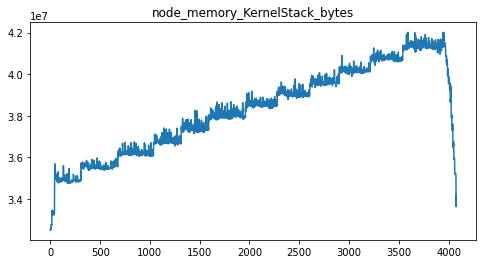

In [5]:
plot_os_metric(df, 'node_memory_KernelStack_bytes')